# DATA GATHERING AND EDA

In [260]:
    #import the packages that I will need for the projects
import pandas as pd
import pyreadstat as prs #in order to read SPSS files
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from mpl_toolkits import mplot3d
import Helpers

In [151]:
    #read the data - the data is in SPSS format
df, meta = prs.read_sav('W35_May18/ATP W35.sav')
    #Read the data with the labels in csv format
df_label = pd.read_csv('W35_May18/ATP W35.csv')

In [152]:
    #Check the data
print(df.shape)
df.head()

(4594, 190)


,QKEY,Device_Type_W35,LANGUAGE_W35,FORM_W35,ALG1_W35,ECIMPA_W35,ECIMPB_W35,ECIMPC_W35,ECIMPD_W35,ECIMPE_W35,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME_FINAL,F_INCOME_RECODE_FINAL,F_REG_FINAL,F_IDEO_FINAL,F_INTUSER_FINAL,F_VOLSUM_FINAL,WEIGHT_W35
0,100197.0,2.0,9.0,1.0,1.0,3.0,1.0,2.0,1.0,NaN,...,2.0,NaN,2.0,3.0,3.0,1.0,3.0,1.0,1.0,0.295954
1,100260.0,2.0,9.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0,...,1.0,NaN,1.0,6.0,2.0,1.0,1.0,1.0,2.0,0.414951
2,100314.0,1.0,9.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,...,1.0,NaN,1.0,4.0,2.0,1.0,2.0,1.0,1.0,0.187774
3,100363.0,1.0,9.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,...,2.0,NaN,2.0,8.0,1.0,1.0,3.0,1.0,2.0,1.205720
4,100446.0,3.0,9.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,...,2.0,NaN,2.0,7.0,1.0,1.0,4.0,1.0,1.0,0.110696


In [153]:
df_label.head()

,QKEY,Device_Type_W35,LANGUAGE_W35,FORM_W35,ALG1_W35,ECIMPA_W35,ECIMPB_W35,ECIMPC_W35,ECIMPD_W35,ECIMPE_W35,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME_FINAL,F_INCOME_RECODE_FINAL,F_REG_FINAL,F_IDEO_FINAL,F_INTUSER_FINAL,F_VOLSUM_FINAL,WEIGHT_W35
0,100197,Tablet,English,Form 1,It is possible for computer programs to make d...,About the right amount,Too much power and influence,Not enough power and influence,Too much power and influence,,...,Democrat,,Dem/lean Dem,"20 to under $30,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,Yes,0.295954
1,100260,Tablet,English,Form 2,Computer programs will always reflect the bias...,,,,,About the right amount,...,Republican,,Rep/lean Rep,"50 to under $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Internet User,No,0.414951
2,100314,Mobile phone,English,Form 1,Computer programs will always reflect the bias...,Too much power and influence,Not enough power and influence,Too much power and influence,Too much power and influence,,...,Republican,,Rep/lean Rep,"30 to under $40,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.187774
3,100363,Mobile phone,English,Form 1,It is possible for computer programs to make d...,About the right amount,Too much power and influence,Too much power and influence,Too much power and influence,,...,Democrat,,Dem/lean Dem,"100 to under $150,000 [OR]","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,1.205720
4,100446,Desktop,English,Form 1,Computer programs will always reflect the bias...,Too much power and influence,Too much power and influence,Not enough power and influence,Too much power and influence,,...,Democrat,,Dem/lean Dem,"75 to under $100,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,Yes,0.110696


In [154]:
len(df)

4594

In [155]:
col = list(df.columns)
col

['QKEY',
 'Device_Type_W35',
 'LANGUAGE_W35',
 'FORM_W35',
 'ALG1_W35',
 'ECIMPA_W35',
 'ECIMPB_W35',
 'ECIMPC_W35',
 'ECIMPD_W35',
 'ECIMPE_W35',
 'ECIMPF_W35',
 'ECIMPG_W35',
 'ECIMPH_W35',
 'TC2A_W35',
 'TC2B_W35',
 'TC2C_W35',
 'TC3A_W35',
 'TC3B_W35',
 'TC3C_W35',
 'TC4_W35',
 'TC5_W35',
 'TC6A_W35',
 'TC6B_W35',
 'SNSA_W35',
 'SNSB_W35',
 'SNSE_W35',
 'SNSH_W35',
 'SNSJ_W35',
 'SNSL_W35',
 'SNSUSER_W35',
 'SNSFRA_W35',
 'SNSFRB_W35',
 'SM1A_W35',
 'SM1B_W35',
 'SM1C_W35',
 'SM1D_W35',
 'SM1E_W35',
 'SM1F_W35',
 'SM2A_W35',
 'SM2B_W35',
 'SM2C_W35',
 'SM2D_W35',
 'SM3_W35',
 'SM4A_W35',
 'SM4B_W35',
 'SM4C_W35',
 'SM4D_W35',
 'SM5A_W35',
 'SM5B_W35',
 'SM5C_W35',
 'SM5D_W35',
 'SM6A_W35',
 'SM6B_W35',
 'SM7_W35',
 'SM8A_W35',
 'SM8B_W35',
 'SM8C_W35',
 'SM9A_W35',
 'SM9B_W35',
 'SM9C_W35',
 'SM9D_W35',
 'SM9E_W35',
 'SM10A_W35',
 'SM10B_W35',
 'SM10C_W35',
 'SM10D_W35',
 'SM10E_W35',
 'SM11_W35',
 'SM12A_W35',
 'SM12B_W35',
 'SM12C_W35',
 'SM13A_W35',
 'SM13B_W35',
 'SM13C_W35',
 

In [156]:
len(col)

190

In [157]:
#Check the target variables for eventual class imbalance
df.ALG1_W35.value_counts()

2.0     2790
1.0     1713
99.0      91
Name: ALG1_W35, dtype: int64

In [158]:
df_label.ALG1_W35.value_counts()

Computer programs will always reflect the biases of the people who designed them    2790
It is possible for computer programs to make decisions without human bias           1713
Refused                                                                               91
Name: ALG1_W35, dtype: int64

In [159]:
#remove the non answer
df = df[df.ALG1_W35 != 99]
df_label = df_label[df_label.ALG1_W35 != 'Refused']

In [160]:
df.ALG1_W35.value_counts()

2.0    2790
1.0    1713
Name: ALG1_W35, dtype: int64

In [161]:
df_label.ALG1_W35.value_counts()

Computer programs will always reflect the biases of the people who designed them    2790
It is possible for computer programs to make decisions without human bias           1713
Name: ALG1_W35, dtype: int64

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4503 entries, 0 to 4593
Columns: 190 entries, QKEY to WEIGHT_W35
dtypes: float64(190)
memory usage: 6.6 MB


In [163]:
col

['QKEY',
 'Device_Type_W35',
 'LANGUAGE_W35',
 'FORM_W35',
 'ALG1_W35',
 'ECIMPA_W35',
 'ECIMPB_W35',
 'ECIMPC_W35',
 'ECIMPD_W35',
 'ECIMPE_W35',
 'ECIMPF_W35',
 'ECIMPG_W35',
 'ECIMPH_W35',
 'TC2A_W35',
 'TC2B_W35',
 'TC2C_W35',
 'TC3A_W35',
 'TC3B_W35',
 'TC3C_W35',
 'TC4_W35',
 'TC5_W35',
 'TC6A_W35',
 'TC6B_W35',
 'SNSA_W35',
 'SNSB_W35',
 'SNSE_W35',
 'SNSH_W35',
 'SNSJ_W35',
 'SNSL_W35',
 'SNSUSER_W35',
 'SNSFRA_W35',
 'SNSFRB_W35',
 'SM1A_W35',
 'SM1B_W35',
 'SM1C_W35',
 'SM1D_W35',
 'SM1E_W35',
 'SM1F_W35',
 'SM2A_W35',
 'SM2B_W35',
 'SM2C_W35',
 'SM2D_W35',
 'SM3_W35',
 'SM4A_W35',
 'SM4B_W35',
 'SM4C_W35',
 'SM4D_W35',
 'SM5A_W35',
 'SM5B_W35',
 'SM5C_W35',
 'SM5D_W35',
 'SM6A_W35',
 'SM6B_W35',
 'SM7_W35',
 'SM8A_W35',
 'SM8B_W35',
 'SM8C_W35',
 'SM9A_W35',
 'SM9B_W35',
 'SM9C_W35',
 'SM9D_W35',
 'SM9E_W35',
 'SM10A_W35',
 'SM10B_W35',
 'SM10C_W35',
 'SM10D_W35',
 'SM10E_W35',
 'SM11_W35',
 'SM12A_W35',
 'SM12B_W35',
 'SM12C_W35',
 'SM13A_W35',
 'SM13B_W35',
 'SM13C_W35',
 

In [217]:
#Make a selection of columns I would keep for the study
cols_selected = ['ALG1_W35','TC2A_W35','TC2C_W35','TC4_W35','TC5_W35','TC6A_W35','SNSA_W35',
                 'SNSB_W35','SNSE_W35','SNSH_W35','SNSJ_W35', 'SM1A_W35','SM1B_W35','SM1C_W35',
                 'SM1D_W35','SM1E_W35','SM1F_W35','SM3_W35','SM4A_W35','SM4B_W35','SM4C_W35',
                 'SM4D_W35','SM11_W35','SM13A_W35','SM13B_W35','SM13C_W35','F_AGECAT_FINAL',
                 'F_SEX_FINAL','F_MARITAL_FINAL','F_RELIG_FINAL','F_INCOME_FINAL','F_INTUSER_FINAL']

In [218]:
print(cols_selected,'\n')
print(len(cols_selected))

['ALG1_W35', 'TC2A_W35', 'TC2C_W35', 'TC4_W35', 'TC5_W35', 'TC6A_W35', 'SNSA_W35', 'SNSB_W35', 'SNSE_W35', 'SNSH_W35', 'SNSJ_W35', 'SM1A_W35', 'SM1B_W35', 'SM1C_W35', 'SM1D_W35', 'SM1E_W35', 'SM1F_W35', 'SM3_W35', 'SM4A_W35', 'SM4B_W35', 'SM4C_W35', 'SM4D_W35', 'SM11_W35', 'SM13A_W35', 'SM13B_W35', 'SM13C_W35', 'F_AGECAT_FINAL', 'F_SEX_FINAL', 'F_MARITAL_FINAL', 'F_RELIG_FINAL', 'F_INCOME_FINAL', 'F_INTUSER_FINAL'] 

32


In [200]:
#Create a data frame with only the selected columns
data = df[cols_selected]

In [201]:
data_with_label = df_label[cols_selected]

In [202]:
data.shape

(4503, 32)

In [203]:
data.head()

,ALG1_W35,TC2A_W35,TC2C_W35,TC4_W35,TC5_W35,TC6A_W35,SNSA_W35,SNSB_W35,SNSE_W35,SNSH_W35,...,SM11_W35,SM13A_W35,SM13B_W35,SM13C_W35,F_AGECAT_FINAL,F_SEX_FINAL,F_MARITAL_FINAL,F_RELIG_FINAL,F_INCOME_FINAL,F_INTUSER_FINAL
0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,3.0,1.0
1,2.0,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,4.0,1.0,6.0,12.0,6.0,1.0
2,2.0,3.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,...,NaN,3.0,2.0,3.0,4.0,1.0,2.0,1.0,4.0,1.0
3,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,8.0,1.0
4,2.0,3.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,2.0,6.0,11.0,7.0,1.0


In [204]:
data_with_label.head()

,ALG1_W35,TC2A_W35,TC2C_W35,TC4_W35,TC5_W35,TC6A_W35,SNSA_W35,SNSB_W35,SNSE_W35,SNSH_W35,...,SM11_W35,SM13A_W35,SM13B_W35,SM13C_W35,F_AGECAT_FINAL,F_SEX_FINAL,F_MARITAL_FINAL,F_RELIG_FINAL,F_INCOME_FINAL,F_INTUSER_FINAL
0,It is possible for computer programs to make d...,Some of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Facebook,Not selected,Not selected,Not selected,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,65+,Female,Divorced,Roman Catholic,"20 to under $30,000",Internet User
1,Computer programs will always reflect the bias...,Some of the time,More good than bad,Less ethical,About the same as they are now,Support the views of both equally,Not selected,Not selected,Not selected,YouTube,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,65+,Male,Never been married,Nothing in particular,"50 to under $75,000",Internet User
2,Computer programs will always reflect the bias...,Some of the time,More good than bad,About as ethical as other companies,More than they are now,Support the views of both equally,Not selected,Not selected,Not selected,Not selected,...,,Not very important,Somewhat important,Not very important,65+,Male,Living with a partner,Protestant,"30 to under $40,000",Internet User
3,It is possible for computer programs to make d...,Most of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Facebook,Not selected,Instagram,YouTube,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,30-49,Female,Married,Roman Catholic,"100 to under $150,000 [OR]",Internet User
4,Computer programs will always reflect the bias...,Some of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Not selected,Not selected,Not selected,Not selected,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,50-64,Female,Never been married,"Something else, Specify:","75 to under $100,000",Internet User


In [205]:
data.F_SEX_FINAL.value_counts()

1.0    2260
2.0    2243
Name: F_SEX_FINAL, dtype: int64

In [207]:
data.dtypes

ALG1_W35           float64
TC2A_W35           float64
TC2C_W35           float64
TC4_W35            float64
TC5_W35            float64
TC6A_W35           float64
SNSA_W35           float64
SNSB_W35           float64
SNSE_W35           float64
SNSH_W35           float64
SNSJ_W35           float64
SM1A_W35           float64
SM1B_W35           float64
SM1C_W35           float64
SM1D_W35           float64
SM1E_W35           float64
SM1F_W35           float64
SM3_W35            float64
SM4A_W35           float64
SM4B_W35           float64
SM4C_W35           float64
SM4D_W35           float64
SM11_W35           float64
SM13A_W35          float64
SM13B_W35          float64
SM13C_W35          float64
F_AGECAT_FINAL     float64
F_SEX_FINAL        float64
F_MARITAL_FINAL    float64
F_RELIG_FINAL      float64
F_INCOME_FINAL     float64
F_INTUSER_FINAL    float64
dtype: object

In [208]:
#replace the value of the target variables by 1 and 2 and leave the features with 
data_with_label['ALG1_W35'] = data_with_label['ALG1_W35'].replace({'Computer programs will always reflect the biases of the people who designed them': 2, 'It is possible for computer programs to make decisions without human bias': 1})


In [209]:
data_with_label.ALG1_W35.value_counts()

2    2790
1    1713
Name: ALG1_W35, dtype: int64

In [210]:
data_with_label.head()

,ALG1_W35,TC2A_W35,TC2C_W35,TC4_W35,TC5_W35,TC6A_W35,SNSA_W35,SNSB_W35,SNSE_W35,SNSH_W35,...,SM11_W35,SM13A_W35,SM13B_W35,SM13C_W35,F_AGECAT_FINAL,F_SEX_FINAL,F_MARITAL_FINAL,F_RELIG_FINAL,F_INCOME_FINAL,F_INTUSER_FINAL
0,1,Some of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Facebook,Not selected,Not selected,Not selected,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,65+,Female,Divorced,Roman Catholic,"20 to under $30,000",Internet User
1,2,Some of the time,More good than bad,Less ethical,About the same as they are now,Support the views of both equally,Not selected,Not selected,Not selected,YouTube,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,65+,Male,Never been married,Nothing in particular,"50 to under $75,000",Internet User
2,2,Some of the time,More good than bad,About as ethical as other companies,More than they are now,Support the views of both equally,Not selected,Not selected,Not selected,Not selected,...,,Not very important,Somewhat important,Not very important,65+,Male,Living with a partner,Protestant,"30 to under $40,000",Internet User
3,1,Most of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Facebook,Not selected,Instagram,YouTube,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,30-49,Female,Married,Roman Catholic,"100 to under $150,000 [OR]",Internet User
4,2,Some of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Not selected,Not selected,Not selected,Not selected,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,50-64,Female,Never been married,"Something else, Specify:","75 to under $100,000",Internet User


# Change the names of the columns

In [219]:
cols_selected

['ALG1_W35',
 'TC2A_W35',
 'TC2C_W35',
 'TC4_W35',
 'TC5_W35',
 'TC6A_W35',
 'SNSA_W35',
 'SNSB_W35',
 'SNSE_W35',
 'SNSH_W35',
 'SNSJ_W35',
 'SM1A_W35',
 'SM1B_W35',
 'SM1C_W35',
 'SM1D_W35',
 'SM1E_W35',
 'SM1F_W35',
 'SM3_W35',
 'SM4A_W35',
 'SM4B_W35',
 'SM4C_W35',
 'SM4D_W35',
 'SM11_W35',
 'SM13A_W35',
 'SM13B_W35',
 'SM13C_W35',
 'F_AGECAT_FINAL',
 'F_SEX_FINAL',
 'F_MARITAL_FINAL',
 'F_RELIG_FINAL',
 'F_INCOME_FINAL',
 'F_INTUSER_FINAL']

In [222]:
#Create a list for the new names of the columns
new_columns_name = ['Computer_Decisions', 'Trust_Major_Tech', 'Impact_Tech','Ethics_Company','Regulation_Gvt',
                   'Gender_view_Tech','Use_Facebook','Use_Twitter', 'Use_Instagram','Use_YouTube','Use_Snapchat',
                   'Freq_Angry_Content','Freq_Inspired_Content','Freq_Amused_Content','Freq_Depressed_Content',
                   'Freq_Connected_Content','Freq_Lonely_Content','Accuracy_Content', 'Figure_my_Hobbies',
                   'Figure_my_political_aff','Figure_my_religious_beliefs','Figure_my_race','Change_political_view',
                   'Social_media_election','Social_media_influence_policy','Social_media_create_movement',
                   'Age_category','Sex','Marital_Status','Religion','Income','Internet_User']

In [228]:
#double check that mapping was done correctly
for i,val in enumerate(cols_selected):
    print(i+1,".-",val,"-->",new_columns_name[i])

1 .- ALG1_W35 --> Computer_Decisions
2 .- TC2A_W35 --> Trust_Major_Tech
3 .- TC2C_W35 --> Impact_Tech
4 .- TC4_W35 --> Ethics_Company
5 .- TC5_W35 --> Regulation_Gvt
6 .- TC6A_W35 --> Gender_view_Tech
7 .- SNSA_W35 --> Use_Facebook
8 .- SNSB_W35 --> Use_Twitter
9 .- SNSE_W35 --> Use_Instagram
10 .- SNSH_W35 --> Use_YouTube
11 .- SNSJ_W35 --> Use_Snapchat
12 .- SM1A_W35 --> Freq_Angry_Content
13 .- SM1B_W35 --> Freq_Inspired_Content
14 .- SM1C_W35 --> Freq_Amused_Content
15 .- SM1D_W35 --> Freq_Depressed_Content
16 .- SM1E_W35 --> Freq_Connected_Content
17 .- SM1F_W35 --> Freq_Lonely_Content
18 .- SM3_W35 --> Accuracy_Content
19 .- SM4A_W35 --> Figure_my_Hobbies
20 .- SM4B_W35 --> Figure_my_political_aff
21 .- SM4C_W35 --> Figure_my_religious_beliefs
22 .- SM4D_W35 --> Figure_my_race
23 .- SM11_W35 --> Change_political_view
24 .- SM13A_W35 --> Social_media_election
25 .- SM13B_W35 --> Social_media_influence_policy
26 .- SM13C_W35 --> Social_media_create_movement
27 .- F_AGECAT_FINAL -->

In [273]:
#updating the columns name with a more comprehensible name
for i in range(len(cols_selected)):
    data_with_label=data_with_label.rename(columns={cols_selected[i]:new_columns_name[i]})
    data=data.rename(columns={cols_selected[i]:new_columns_name[i]})

In [242]:
#Checking my data
data_with_label.head()

,Computer_Decisions,Trust_Major_Tech,Impact_Tech,Ethics_Company,Regulation_Gvt,Gender_view_Tech,Use_Facebook,Use_Twitter,Use_Instagram,Use_YouTube,...,Change_political_view,Social_media_election,Social_media_influence_policy,Social_media_create_movement,Age_category,Sex,Marital_Status,Religion,Income,Internet_User
0,1,Some of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Facebook,Not selected,Not selected,Not selected,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,65+,Female,Divorced,Roman Catholic,"20 to under $30,000",Internet User
1,2,Some of the time,More good than bad,Less ethical,About the same as they are now,Support the views of both equally,Not selected,Not selected,Not selected,YouTube,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,65+,Male,Never been married,Nothing in particular,"50 to under $75,000",Internet User
2,2,Some of the time,More good than bad,About as ethical as other companies,More than they are now,Support the views of both equally,Not selected,Not selected,Not selected,Not selected,...,,Not very important,Somewhat important,Not very important,65+,Male,Living with a partner,Protestant,"30 to under $40,000",Internet User
3,1,Most of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Facebook,Not selected,Instagram,YouTube,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,30-49,Female,Married,Roman Catholic,"100 to under $150,000 [OR]",Internet User
4,2,Some of the time,More good than bad,About as ethical as other companies,About the same as they are now,Support the views of both equally,Not selected,Not selected,Not selected,Not selected,...,Have not changed my views,Somewhat important,Somewhat important,Somewhat important,50-64,Female,Never been married,"Something else, Specify:","75 to under $100,000",Internet User


In [275]:
data.head()

,Computer_Decisions,Trust_Major_Tech,Impact_Tech,Ethics_Company,Regulation_Gvt,Gender_view_Tech,Use_Facebook,Use_Twitter,Use_Instagram,Use_YouTube,...,Change_political_view,Social_media_election,Social_media_influence_policy,Social_media_create_movement,Age_category,Sex,Marital_Status,Religion,Income,Internet_User
0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,3.0,1.0
1,2.0,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,4.0,1.0,6.0,12.0,6.0,1.0
2,2.0,3.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,...,NaN,3.0,2.0,3.0,4.0,1.0,2.0,1.0,4.0,1.0
3,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,8.0,1.0
4,2.0,3.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,2.0,6.0,11.0,7.0,1.0


In [243]:
#checking the name of the columns
data_with_label.columns

Index(['Computer_Decisions', 'Trust_Major_Tech', 'Impact_Tech',
       'Ethics_Company', 'Regulation_Gvt', 'Gender_view_Tech', 'Use_Facebook',
       'Use_Twitter', 'Use_Instagram', 'Use_YouTube', 'Use_Snapchat',
       'Freq_Angry_Content', 'Freq_Inspired_Content', 'Freq_Amused_Content',
       'Freq_Depressed_Content', 'Freq_Connected_Content',
       'Freq_Lonely_Content', 'Accuracy_Content', 'Figure_my_Hobbies',
       'Figure_my_political_aff', 'Figure_my_religious_beliefs',
       'Figure_my_race', 'Change_political_view', 'Social_media_election',
       'Social_media_influence_policy', 'Social_media_create_movement',
       'Age_category', 'Sex', 'Marital_Status', 'Religion', 'Income',
       'Internet_User'],
      dtype='object')

In [244]:
#checking the lenght of the columns
len(data_with_label.columns)

32

# EDA

In [326]:
#Analysing the value and observations for each variables
for val in list(data_with_label.columns):
    print(val,'\n')
    print(data_with_label[val].value_counts())

Computer_Decisions 

2    2790
1    1713
Name: Computer_Decisions, dtype: int64
Trust_Major_Tech 

Some of the time     2627
Most of the time     1155
Hardly ever           640
Just about always      67
Refused                14
Name: Trust_Major_Tech, dtype: int64
Impact_Tech 

More good than bad    3568
More bad than good     892
Refused                 43
Name: Impact_Tech, dtype: int64
Ethics_Company 

About as ethical as other companies    3306
Less ethical                            893
More ethical                            281
Refused                                  23
Name: Ethics_Company, dtype: int64
Regulation_Gvt 

More than they are now            2422
About the same as they are now    1708
Less than they are now             327
Refused                             46
Name: Regulation_Gvt, dtype: int64
Gender_view_Tech 

Support the views of both equally      2388
Support the views of men over women    1677
Support the views of women over men     356
Refused             

In [245]:
target = data_with_label.Computer_Decisions

In [291]:
target.value_counts()[2]

2790

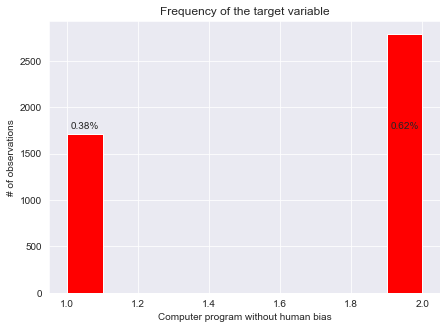

In [365]:
#Checking for class imbalance
sns.set_style('darkgrid')
target.hist(figsize=(7,5),color='red')
plt.title("Frequency of the target variable")
plt.xlabel("Computer program without human bias")
plt.ylabel("# of observations")
plt.text(1.05,1800,str(round(target.value_counts()[1]/len(target),2)) + '%', va='center', ha='center')
plt.text(1.95,1800,str(round(target.value_counts()[2]/len(target),2)) + '%', va='center', ha='center')

plt.show()

In [277]:
#Created a function to plot stacked bar to show interaction of features and target variable
def stacked_bar(var_1, var_2):
    
    x = data_with_label.groupby(var_1)[var_2].value_counts(normalize=True).unstack()
    x.plot(kind='bar', stacked='True', figsize=(12,8))
    plt.legend(loc=1)
    plt.title("View towards computer decisions by "+ var_1)
    plt.xticks(rotation=45)
    plt.show();

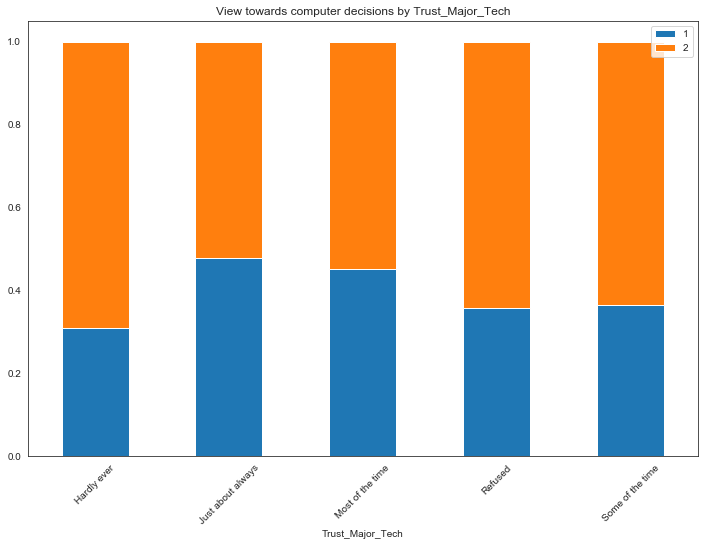

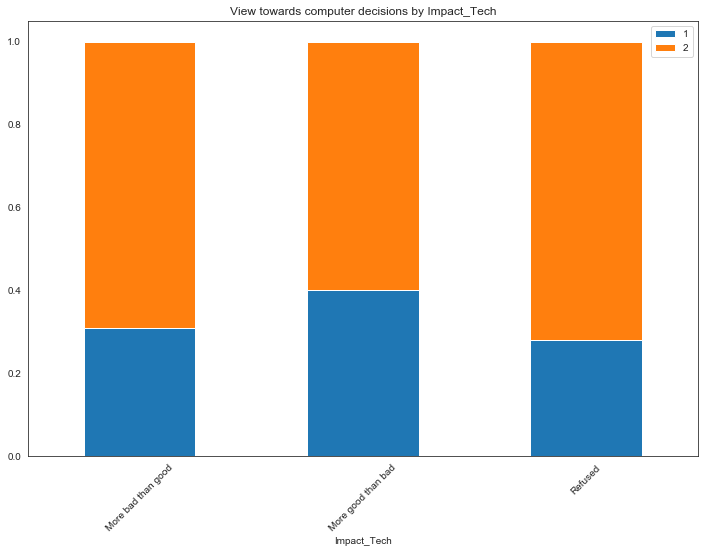

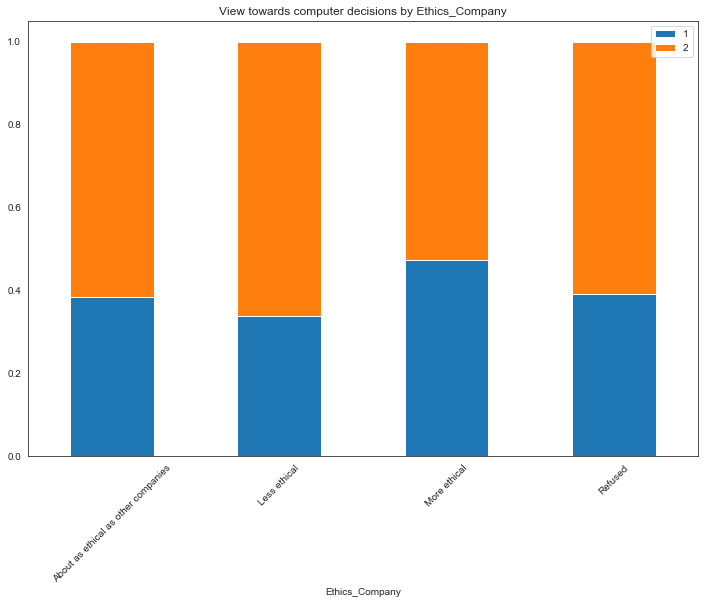

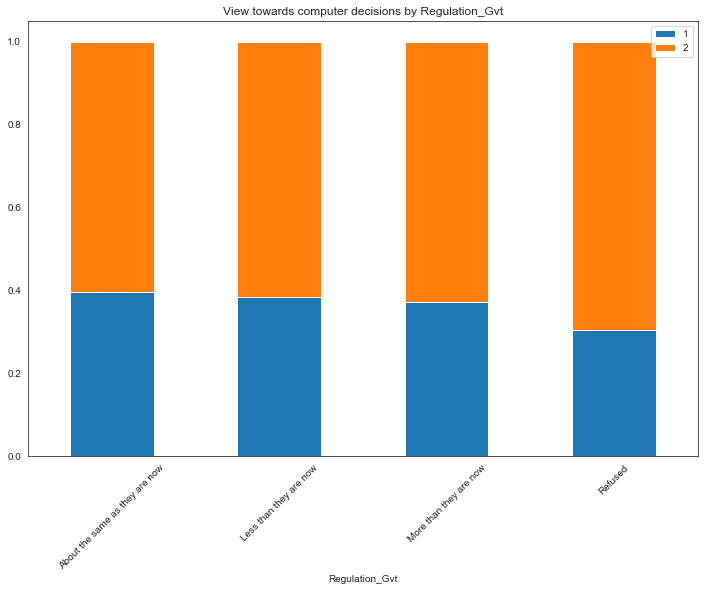

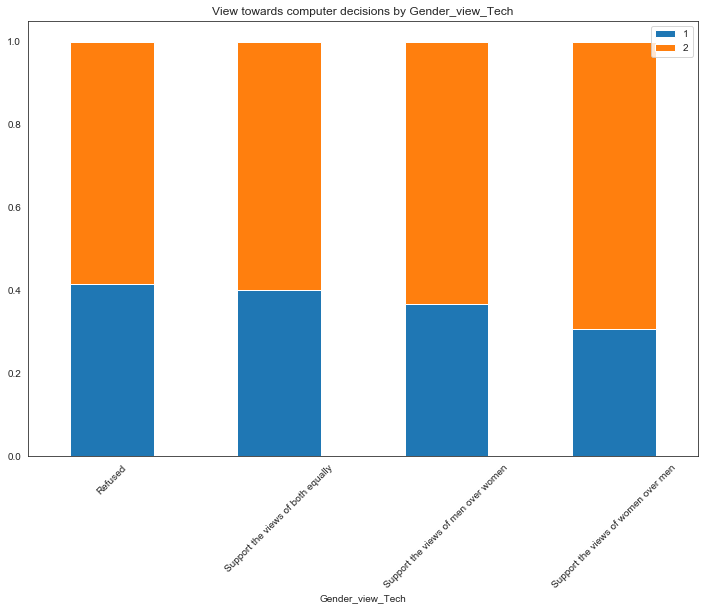

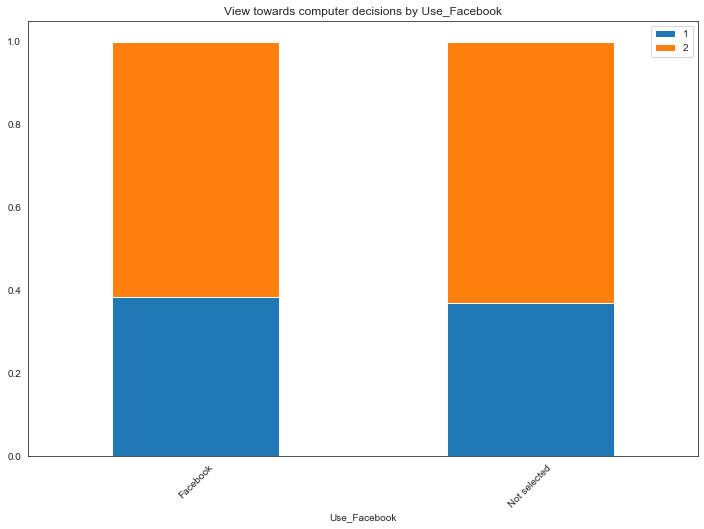

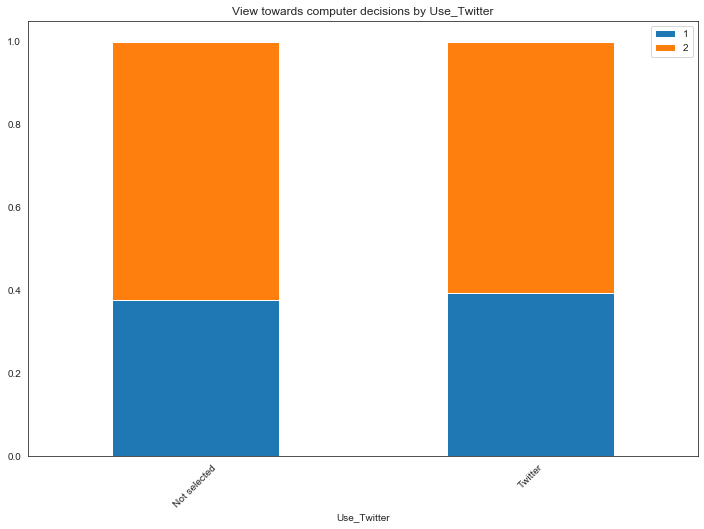

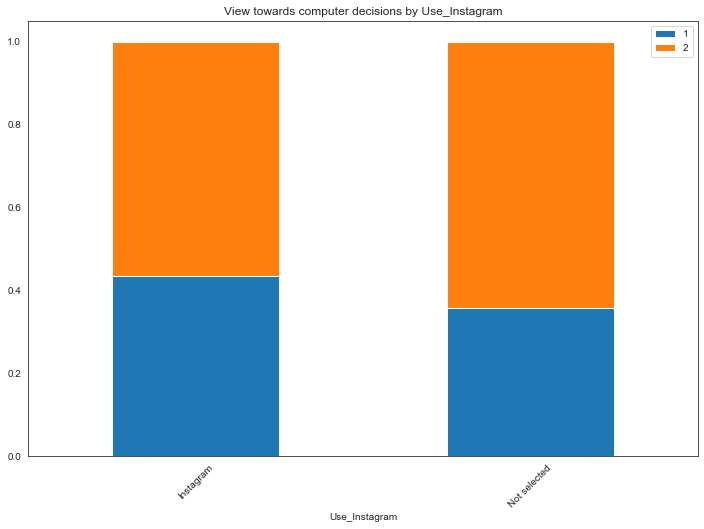

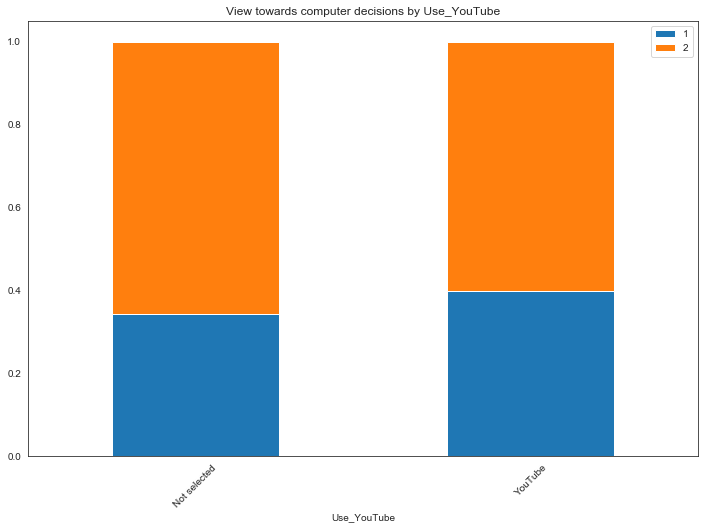

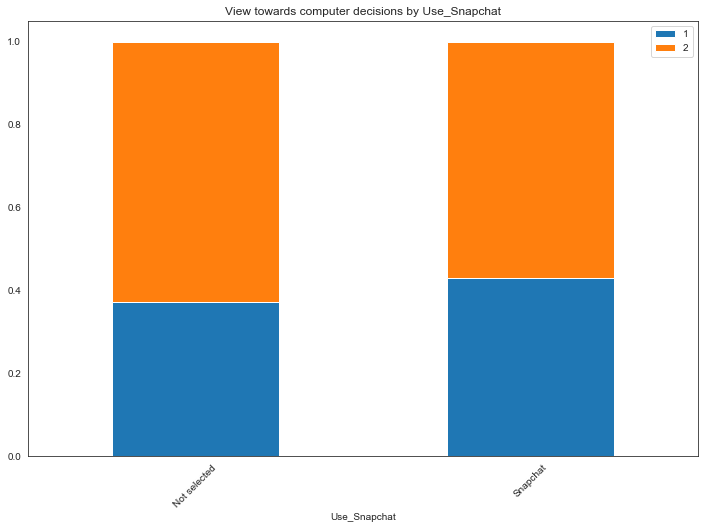

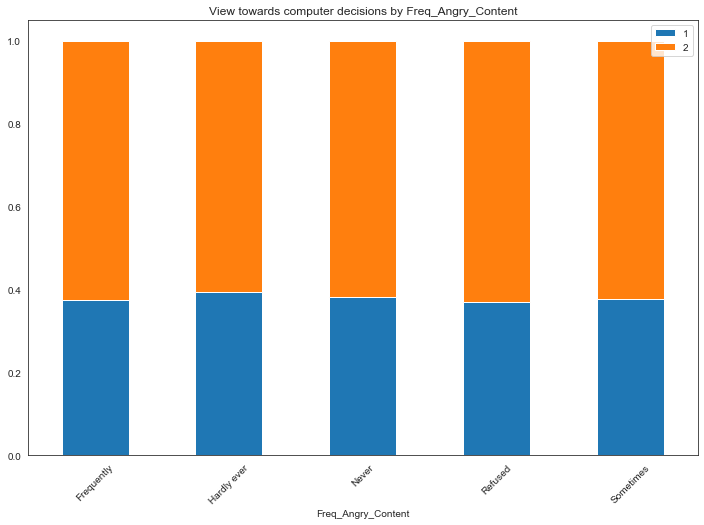

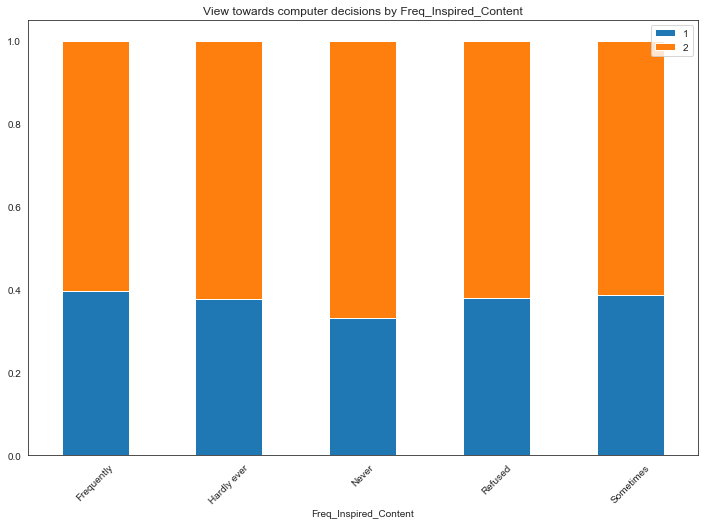

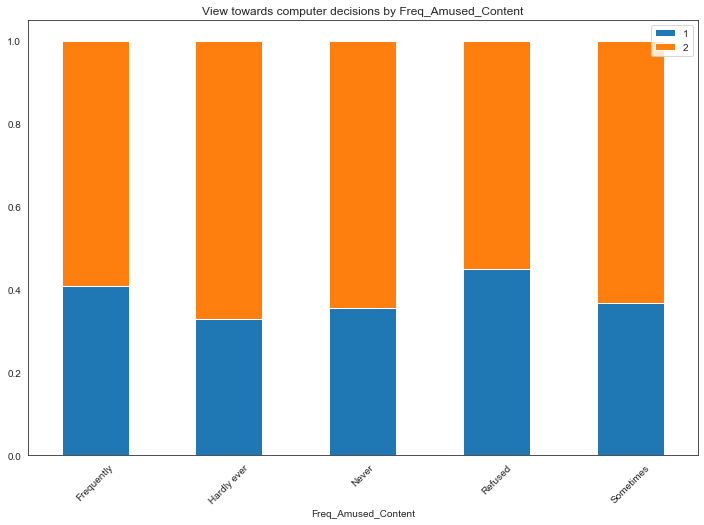

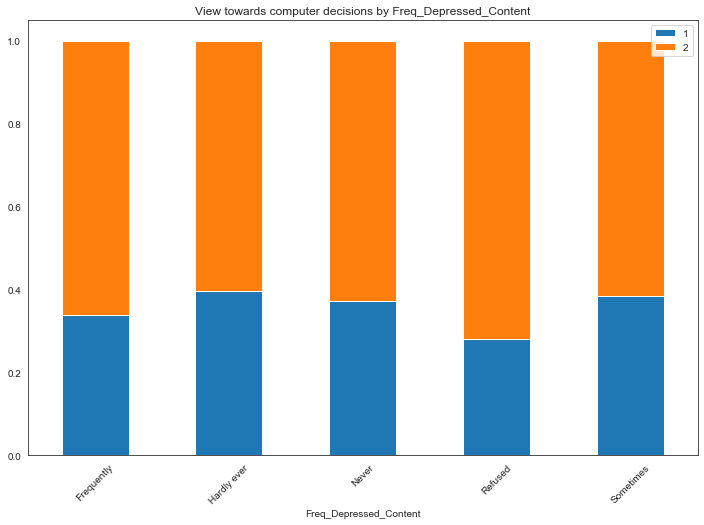

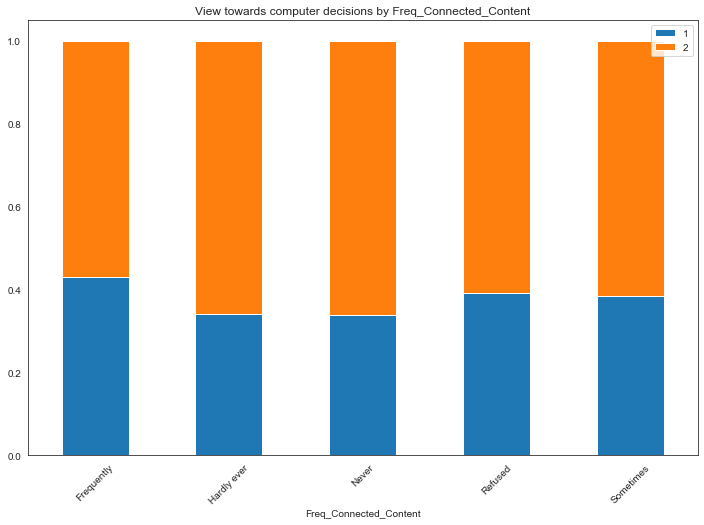

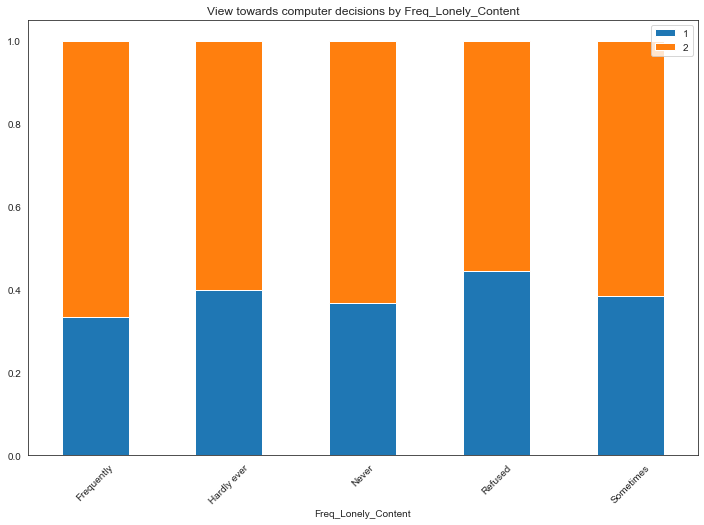

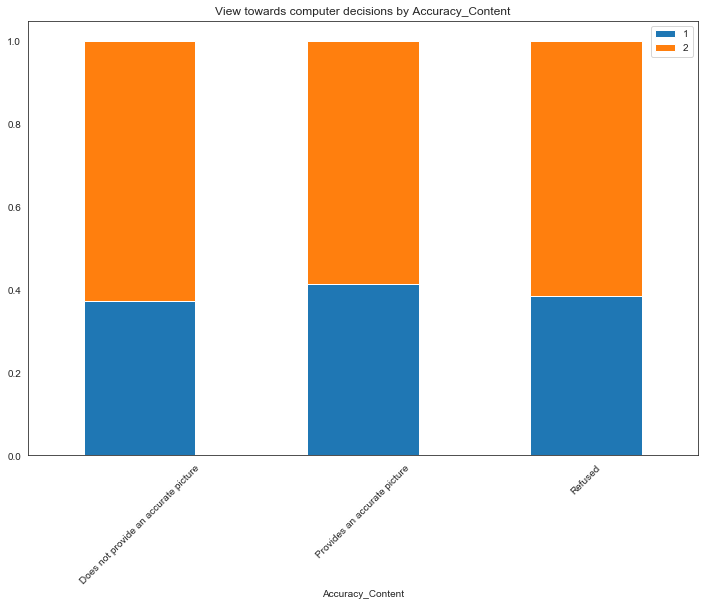

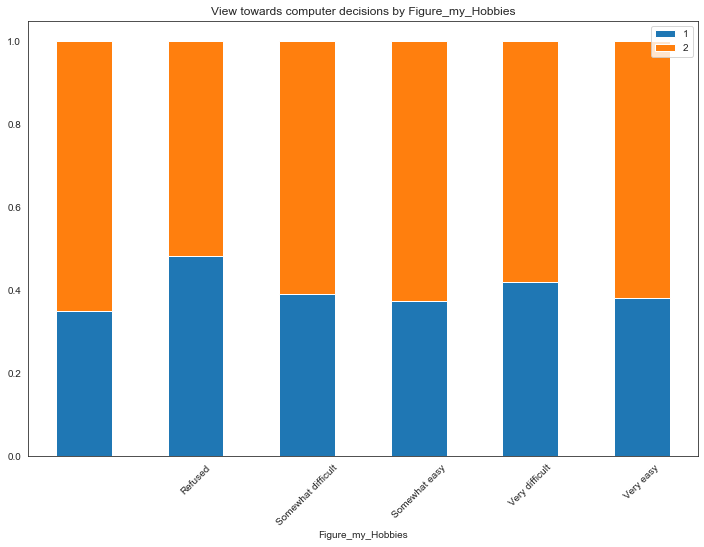

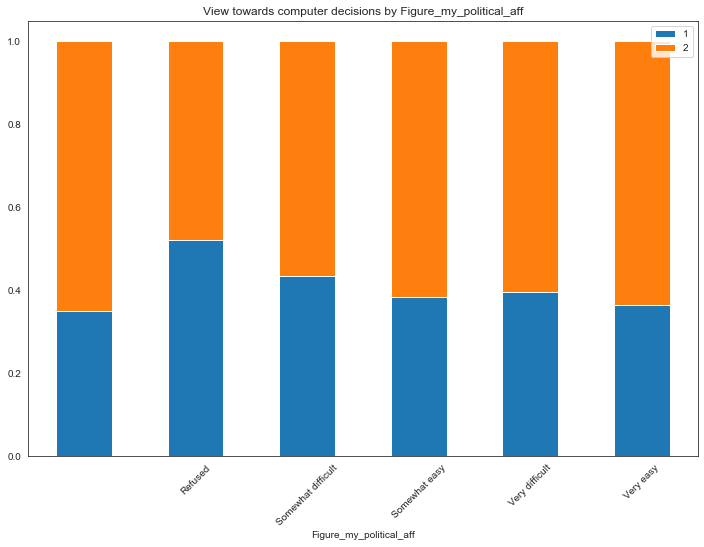

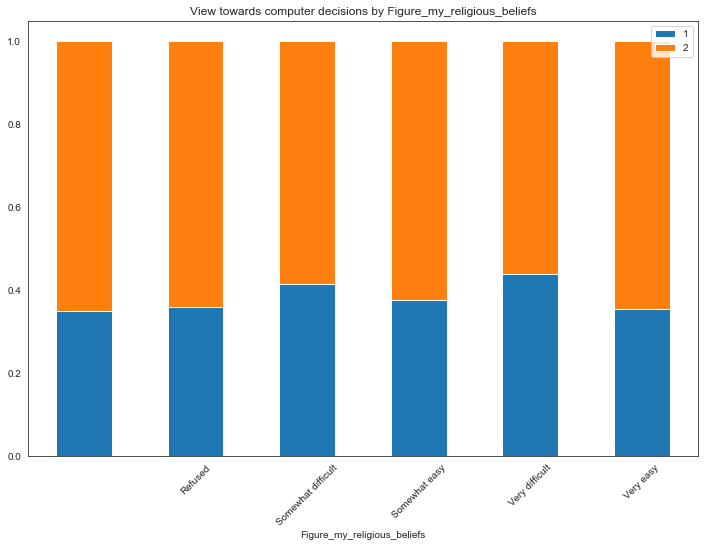

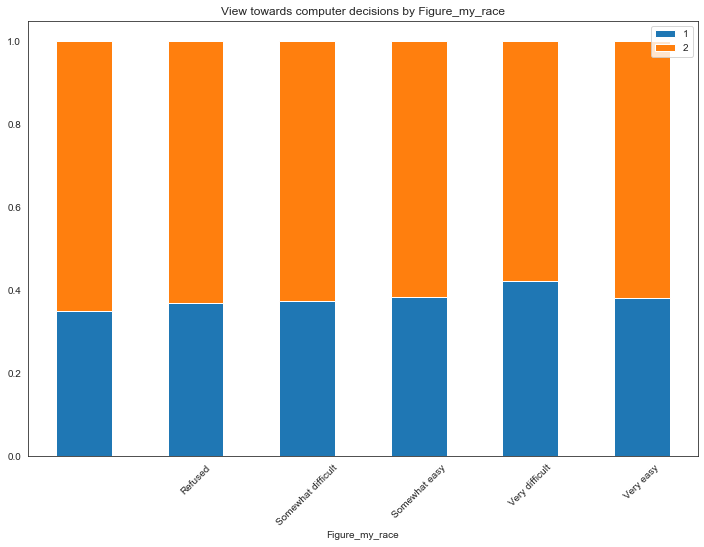

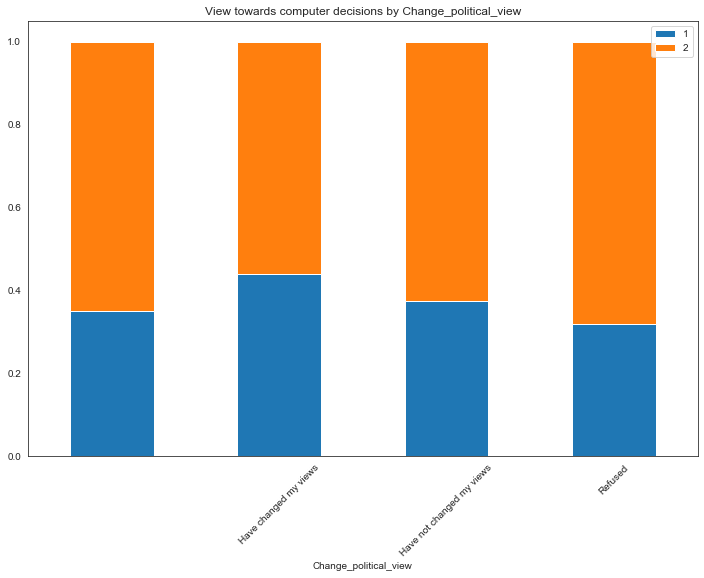

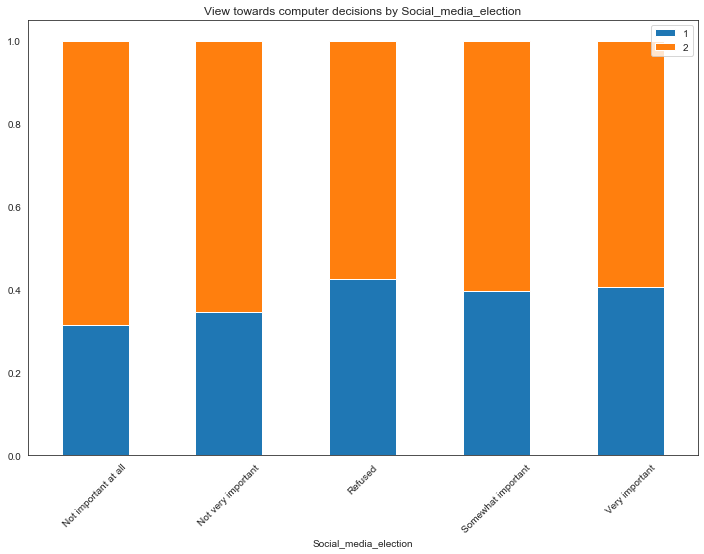

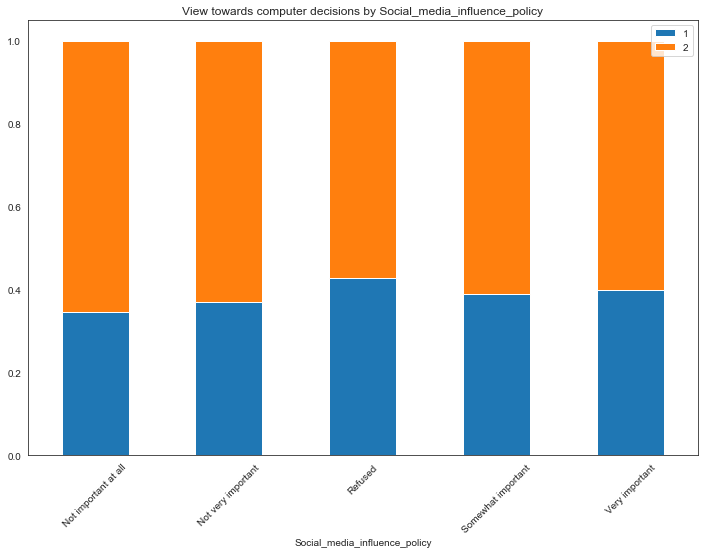

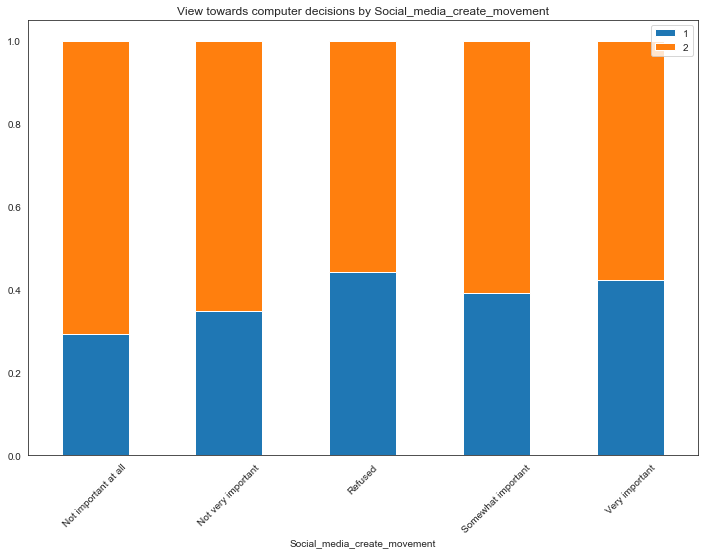

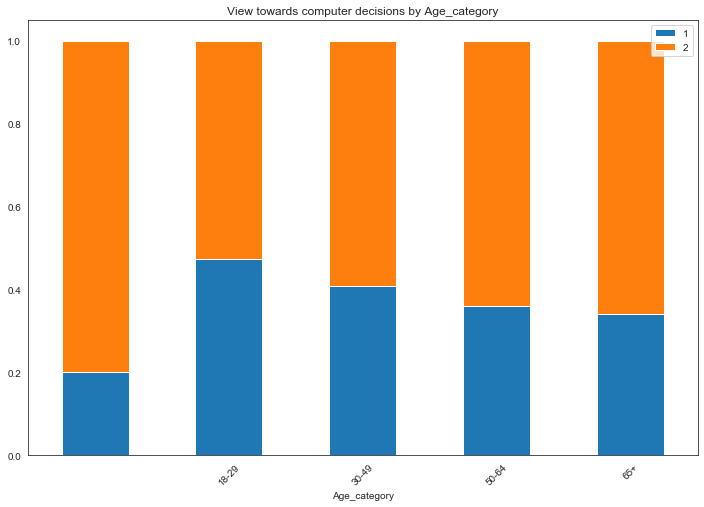

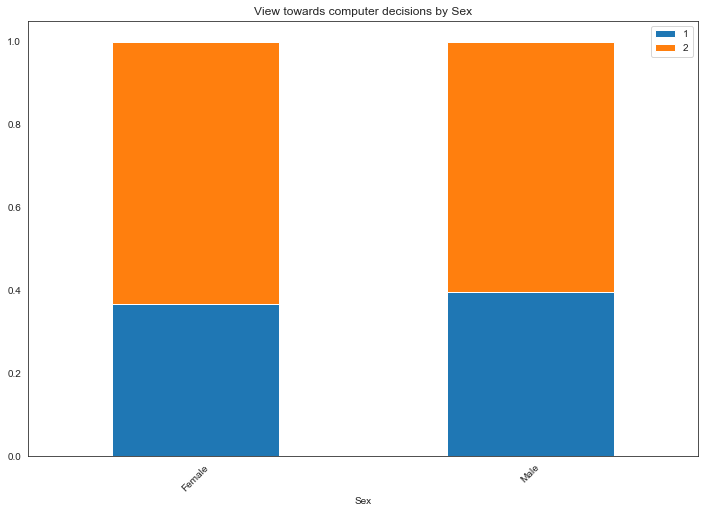

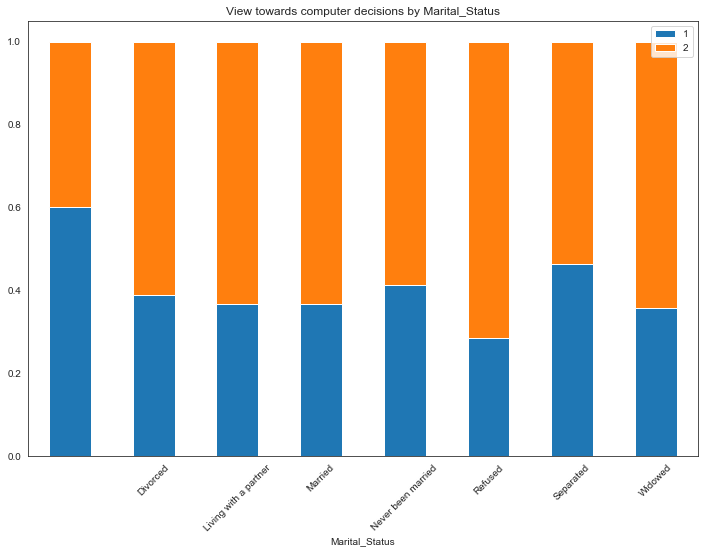

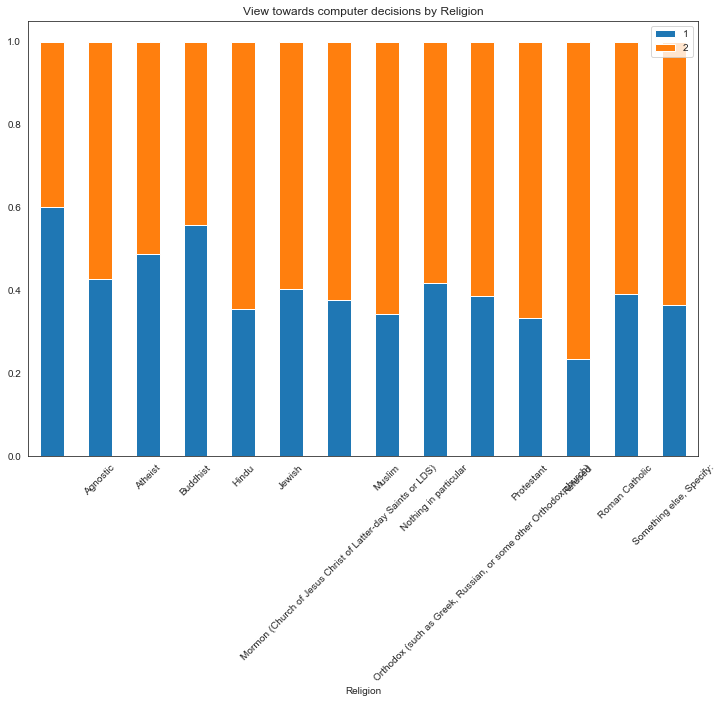

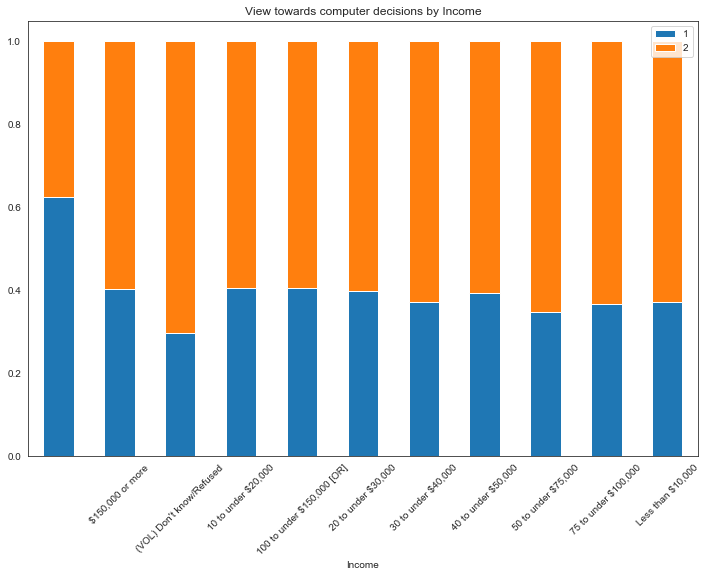

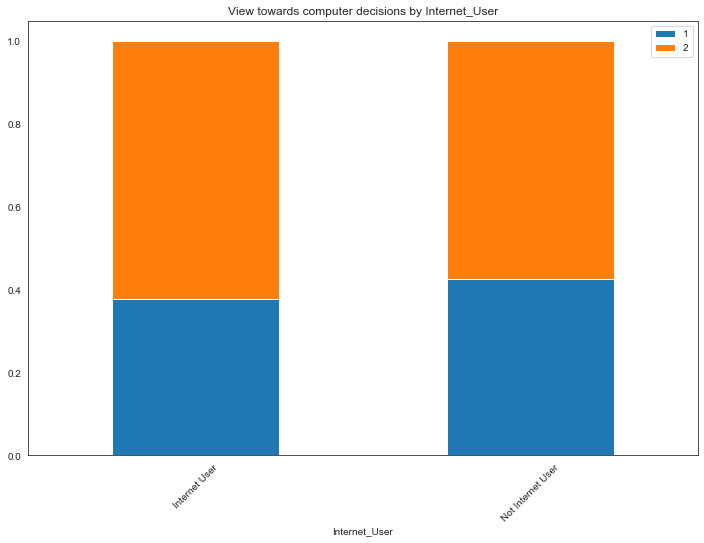

In [278]:
#print the stacked bar for each features vs. the target variables to understand the relationship
var_list = list(data_with_label.columns)[1:]

for feature in var_list:
    
    stacked_bar(feature, 'Computer_Decisions')

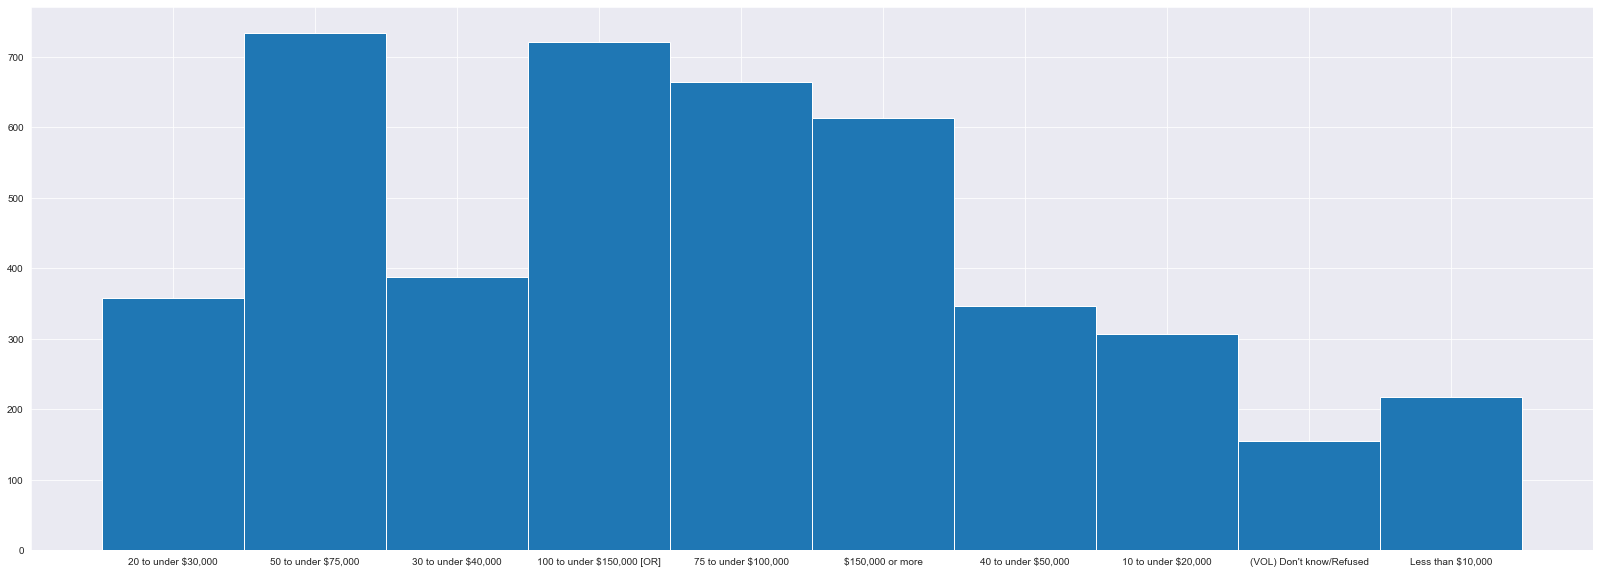

In [372]:
#special graphs for some of the features
data_with_label.Income.hist(figsize=(28,10),align='left')
plt.show()

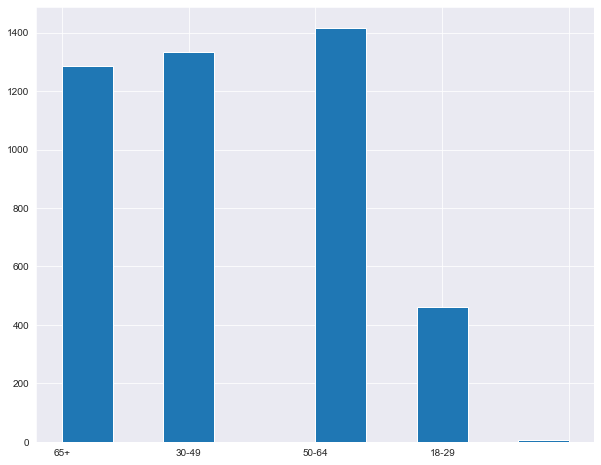

In [374]:
data_with_label.Age_category.hist(figsize=(10,8),align='mid')
plt.show()

## Obviously the 'blank' value are an issue for my data --> DATA CLEANING

## --> working with data DataFrame now

In [348]:
#checking for null
data.isna().sum()

Computer_Decisions                 0
Trust_Major_Tech                   0
Impact_Tech                        0
Ethics_Company                     0
Regulation_Gvt                     0
Gender_view_Tech                   0
Use_Facebook                       0
Use_Twitter                        0
Use_Instagram                      0
Use_YouTube                        0
Use_Snapchat                       0
Freq_Angry_Content                 0
Freq_Inspired_Content              0
Freq_Amused_Content                0
Freq_Depressed_Content             0
Freq_Connected_Content             0
Freq_Lonely_Content                0
Accuracy_Content                   0
Figure_my_Hobbies                272
Figure_my_political_aff          272
Figure_my_religious_beliefs      272
Figure_my_race                   272
Change_political_view            272
Social_media_election              0
Social_media_influence_policy      0
Social_media_create_movement       0
Age_category                       5
S

In [356]:
data = data.dropna()

In [357]:
#checking for null
data.isna().sum()

Computer_Decisions               0
Trust_Major_Tech                 0
Impact_Tech                      0
Ethics_Company                   0
Regulation_Gvt                   0
Gender_view_Tech                 0
Use_Facebook                     0
Use_Twitter                      0
Use_Instagram                    0
Use_YouTube                      0
Use_Snapchat                     0
Freq_Angry_Content               0
Freq_Inspired_Content            0
Freq_Amused_Content              0
Freq_Depressed_Content           0
Freq_Connected_Content           0
Freq_Lonely_Content              0
Accuracy_Content                 0
Figure_my_Hobbies                0
Figure_my_political_aff          0
Figure_my_religious_beliefs      0
Figure_my_race                   0
Change_political_view            0
Social_media_election            0
Social_media_influence_policy    0
Social_media_create_movement     0
Age_category                     0
Sex                              0
Marital_Status      

In [352]:
len(data)

4193

In [360]:
data.sample(10)

,Computer_Decisions,Trust_Major_Tech,Impact_Tech,Ethics_Company,Regulation_Gvt,Gender_view_Tech,Use_Facebook,Use_Twitter,Use_Instagram,Use_YouTube,...,Change_political_view,Social_media_election,Social_media_influence_policy,Social_media_create_movement,Age_category,Sex,Marital_Status,Religion,Income,Internet_User
2997,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,2.0,1.0,3.0,3.0,2.0,2.0,1.0,12.0,8.0,1.0
826,2.0,3.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,4.0,1.0,1.0,12.0,9.0,1.0
4390,2.0,3.0,1.0,99.0,2.0,99.0,1.0,0.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,9.0,6.0,1.0
282,1.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,9.0,8.0,1.0
3774,2.0,3.0,1.0,3.0,3.0,1.0,1.0,0.0,0.0,1.0,...,2.0,3.0,3.0,2.0,4.0,1.0,1.0,9.0,8.0,1.0
1424,2.0,4.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,12.0,6.0,1.0
584,2.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,...,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,8.0,1.0
1399,2.0,3.0,2.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,...,2.0,4.0,4.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0
3548,1.0,3.0,2.0,3.0,1.0,3.0,1.0,0.0,0.0,1.0,...,1.0,1.0,2.0,2.0,3.0,2.0,5.0,5.0,1.0,0.0
1792,1.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,...,1.0,2.0,3.0,2.0,2.0,2.0,6.0,1.0,1.0,1.0


### consider the 99 as neutral value - average of all the options of the variables

In [422]:
len(data.Religion.value_counts())

13

In [423]:
#Observing the different value taken for each variables
for val in list(data.columns):
    print(val,'\n')
    print(data[val].value_counts())

Computer_Decisions 

2.0    2597
1.0    1596
Name: Computer_Decisions, dtype: int64
Trust_Major_Tech 

3.0    2459
2.0    1070
4.0     587
1.0      65
2.5      12
Name: Trust_Major_Tech, dtype: int64
Impact_Tech 

1.0    3332
2.0     825
1.5      36
Name: Impact_Tech, dtype: int64
Ethics_Company 

3.0    3109
2.0     816
1.0     268
Name: Ethics_Company, dtype: int64
Regulation_Gvt 

1.0    2235
3.0    1650
2.0     308
Name: Regulation_Gvt, dtype: int64
Gender_view_Tech 

3.0    2305
1.0    1565
2.0     323
Name: Gender_view_Tech, dtype: int64
Use_Facebook 

1.0    3323
0.0     870
Name: Use_Facebook, dtype: int64
Use_Twitter 

0.0    3138
1.0    1055
Name: Use_Twitter, dtype: int64
Use_Instagram 

0.0    2853
1.0    1340
Name: Use_Instagram, dtype: int64
Use_YouTube 

1.0    3031
0.0    1162
Name: Use_YouTube, dtype: int64
Use_Snapchat 

0.0    3479
1.0     714
Name: Use_Snapchat, dtype: int64
Freq_Angry_Content 

2.0    2122
1.0    1006
3.0     763
4.0     282
2.5      20
Name: Freq_

In [424]:
#Replacing 99 by the average of the modality of the variables
    
    #create a new df to contain the changes
data_cleaned = data
    #Find the number of answers and store it
for val in list(data.columns):
    n = len(data[val].value_counts())
    if (n-1)%2 != 0:
#         print(val, n/2+1)
        data_cleaned[val] = data[val].replace(99,n/2+1)
    else:
#         print(val, n/2)
        data_cleaned[val] = data[val].replace(99,n/2)

In [425]:
#Observing the different value taken for each variables after cleaning
for val in list(data_cleaned.columns):
    print(val,'\n')
    print(data_cleaned[val].value_counts())

Computer_Decisions 

2.0    2597
1.0    1596
Name: Computer_Decisions, dtype: int64
Trust_Major_Tech 

3.0    2459
2.0    1070
4.0     587
1.0      65
2.5      12
Name: Trust_Major_Tech, dtype: int64
Impact_Tech 

1.0    3332
2.0     825
1.5      36
Name: Impact_Tech, dtype: int64
Ethics_Company 

3.0    3109
2.0     816
1.0     268
Name: Ethics_Company, dtype: int64
Regulation_Gvt 

1.0    2235
3.0    1650
2.0     308
Name: Regulation_Gvt, dtype: int64
Gender_view_Tech 

3.0    2305
1.0    1565
2.0     323
Name: Gender_view_Tech, dtype: int64
Use_Facebook 

1.0    3323
0.0     870
Name: Use_Facebook, dtype: int64
Use_Twitter 

0.0    3138
1.0    1055
Name: Use_Twitter, dtype: int64
Use_Instagram 

0.0    2853
1.0    1340
Name: Use_Instagram, dtype: int64
Use_YouTube 

1.0    3031
0.0    1162
Name: Use_YouTube, dtype: int64
Use_Snapchat 

0.0    3479
1.0     714
Name: Use_Snapchat, dtype: int64
Freq_Angry_Content 

2.0    2122
1.0    1006
3.0     763
4.0     282
2.5      20
Name: Freq_

### Exploring cleaned data

In [430]:
#Income Breakdown
pd.DataFrame(data_cleaned.groupby('Income')['Computer_Decisions'].value_counts())

Computer_Decisions
Income Computer_Decisions                    
1.0    2.0                                124
       1.0                                 71
2.0    2.0                                175
       1.0                                120
3.0    2.0                                201
       1.0                                133
4.0    2.0                                227
       1.0                                136
5.0    2.0                                200
       1.0                                125
6.0    2.0                                550
       1.0                                279
7.0    2.0                                392
       1.0                                230
8.0    2.0                                394
       1.0                                276
9.0    2.0                                334
       1.0                                226

In [429]:
#check the income value from the label table
pd.DataFrame(data_with_label.groupby('Income')['Computer_Decisions'].value_counts())

Computer_Decisions
Income                     Computer_Decisions                    
                           1                                   10
                           2                                    6
$150,000 or more           2                                  367
                           1                                  246
(VOL) Don't know/Refused   2                                  109
                           1                                   46
10 to under $20,000        2                                  182
                           1                                  124
100 to under $150,000 [OR] 2                                  429
                           1                                  292
20 to under $30,000        2                                  215
                           1                                  142
30 to under $40,000        2                                  244
                           1                                  144
40 to under $50,000        2                                  211
                           1                                  136
50 to under $75,000        2                                  479
                           1                                  255
75 to under $100,000       2                                  421
                           1                                  243
Less than $10,000          2                                  127
                           1                                   75

In [431]:
#Marital Status Breakdown
pd.DataFrame(data_cleaned.groupby('Marital_Status')['Computer_Decisions'].value_counts())

Computer_Decisions
Marital_Status Computer_Decisions                    
1.0            2.0                               1483
               1.0                                869
2.0            2.0                                186
               1.0                                111
3.0            2.0                                304
               1.0                                190
3.5            2.0                                  5
               1.0                                  2
4.0            2.0                                 50
               1.0                                 43
5.0            2.0                                159
               1.0                                 85
6.0            2.0                                410
               1.0                                296

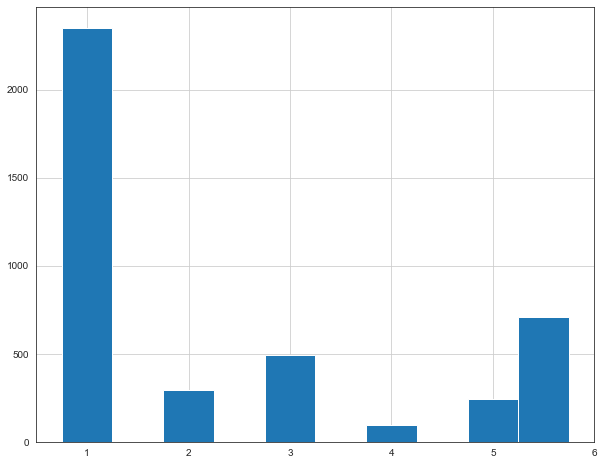

In [411]:
data_cleaned.Marital_Status.hist(figsize=(10,8),align='left')

In [412]:
#checking the data types of my variables
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4193 entries, 0 to 4593
Data columns (total 32 columns):
Computer_Decisions               4193 non-null float64
Trust_Major_Tech                 4193 non-null float64
Impact_Tech                      4193 non-null float64
Ethics_Company                   4193 non-null float64
Regulation_Gvt                   4193 non-null float64
Gender_view_Tech                 4193 non-null float64
Use_Facebook                     4193 non-null float64
Use_Twitter                      4193 non-null float64
Use_Instagram                    4193 non-null float64
Use_YouTube                      4193 non-null float64
Use_Snapchat                     4193 non-null float64
Freq_Angry_Content               4193 non-null float64
Freq_Inspired_Content            4193 non-null float64
Freq_Amused_Content              4193 non-null float64
Freq_Depressed_Content           4193 non-null float64
Freq_Connected_Content           4193 non-null float64
Freq_Lonely_C

In [413]:
data_cleaned=data_cleaned.astype('int64')

In [414]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4193 entries, 0 to 4593
Data columns (total 32 columns):
Computer_Decisions               4193 non-null int64
Trust_Major_Tech                 4193 non-null int64
Impact_Tech                      4193 non-null int64
Ethics_Company                   4193 non-null int64
Regulation_Gvt                   4193 non-null int64
Gender_view_Tech                 4193 non-null int64
Use_Facebook                     4193 non-null int64
Use_Twitter                      4193 non-null int64
Use_Instagram                    4193 non-null int64
Use_YouTube                      4193 non-null int64
Use_Snapchat                     4193 non-null int64
Freq_Angry_Content               4193 non-null int64
Freq_Inspired_Content            4193 non-null int64
Freq_Amused_Content              4193 non-null int64
Freq_Depressed_Content           4193 non-null int64
Freq_Connected_Content           4193 non-null int64
Freq_Lonely_Content              4193 non-nul

In [ ]:
#Create dummies for Marital_Status, Religion



In [432]:
#Function to create the correlation heatmap
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(20, 10))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)

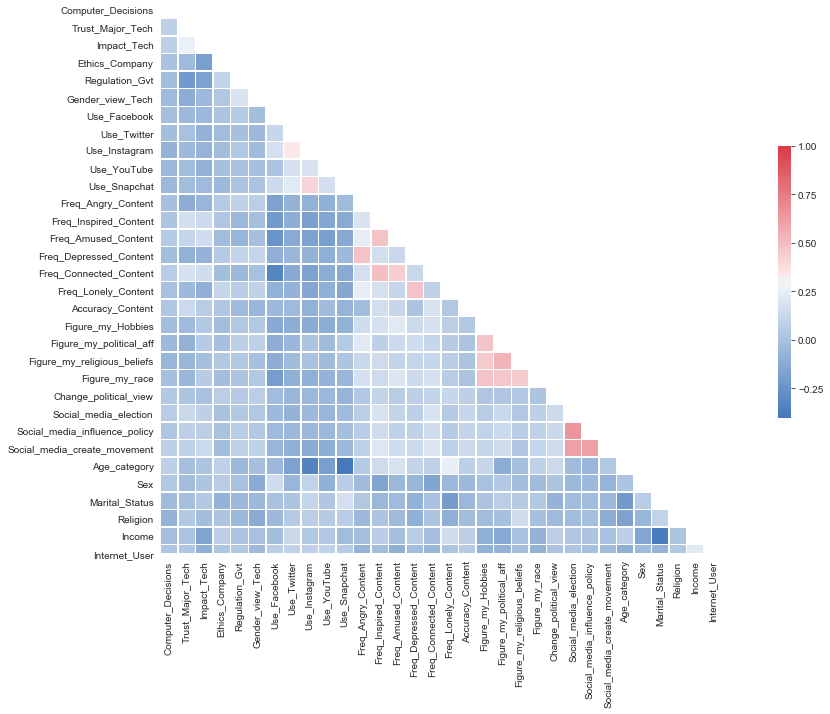

In [433]:
#Plot the correlatiojn heatmap
CorrMtx(data_cleaned.corr(),dropDuplicates = True)

In [417]:
#Computing the correlation of the features and the target variables
abs(data_cleaned.corr()['Computer_Decisions']).sort_values(ascending=False)

Computer_Decisions               1.000000
Age_category                     0.084846
Social_media_create_movement     0.083133
Trust_Major_Tech                 0.082475
Impact_Tech                      0.075397
Use_Instagram                    0.074734
Religion                         0.073720
Freq_Connected_Content           0.064599
Social_media_election            0.062185
Figure_my_religious_beliefs      0.061134
Use_YouTube                      0.051905
Freq_Amused_Content              0.049932
Use_Snapchat                     0.047340
Change_political_view            0.040206
Figure_my_political_aff          0.038332
Gender_view_Tech                 0.035541
Sex                              0.034520
Marital_Status                   0.032379
Social_media_influence_policy    0.032276
Accuracy_Content                 0.028149
Freq_Inspired_Content            0.025116
Internet_User                    0.023818
Regulation_Gvt                   0.019944
Use_Twitter                      0